# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_curve, auc

# Load Data and Feature Extraction

In [2]:
image_folder = "cell_images"
parasitized_folder = os.path.join(image_folder, "Parasitized")
uninfected_folder = os.path.join(image_folder, "Uninfected")

def load_images_and_labels(parasitized_folder, uninfected_folder):
    images = []
    labels = []
    for img_name in os.listdir(parasitized_folder):
        img_path = os.path.join(parasitized_folder, img_name)
        if img_path.endswith(".png"):
            img = load_img(img_path, target_size=(8, 8))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            images.append(img_array.flatten())
            labels.append(1)

    for img_name in os.listdir(uninfected_folder):
        img_path = os.path.join(uninfected_folder, img_name)
        if img_path.endswith(".png"):
            img = load_img(img_path, target_size=(8, 8))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            images.append(img_array.flatten())
            labels.append(0)

    return np.array(images), np.array(labels)

In [3]:
X, Y = load_images_and_labels(parasitized_folder, uninfected_folder)

In [4]:
features_df = pd.DataFrame(X)
features_df['label'] = Y
features_df

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,label
0,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,54.060997,...,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,1
1,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,...,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,1
2,-103.939003,-116.778999,-123.68,58.060997,58.221001,103.32,53.060997,51.221001,96.32,21.060997,...,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,1
3,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,53.060997,...,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,1
4,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,...,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27553,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,44.060997,42.221001,87.32,44.060997,...,48.060997,40.221001,82.32,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,0
27554,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,47.060997,36.221001,87.32,-103.939003,...,48.060997,41.221001,87.32,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,0
27555,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,...,63.060997,58.221001,98.32,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,0
27556,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,44.060997,...,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,-103.939003,-116.778999,-123.68,0


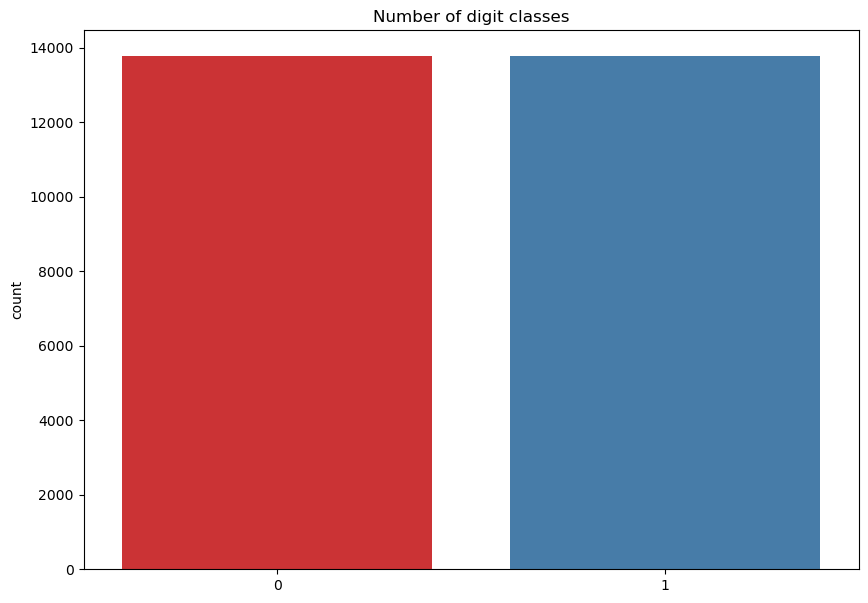

In [5]:
plt.figure(figsize=(10, 7))
sns.countplot(x=Y, hue=Y, palette="Set1", legend=False)
plt.title("Number of digit classes")
plt.show()

# Plot Random Sample of Data

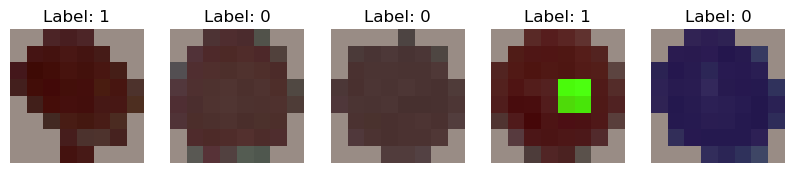

In [6]:
random_indices = np.random.choice(len(X), size=5, replace=False)
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    img = X[idx].reshape(8, 8, 3)
    if img.max() <= 1.0:
        img = img * 255
    plt.subplot(1, 5, i + 1)
    plt.imshow(img.astype('uint8'))
    plt.title(f"Label: {Y[idx]}")
    plt.axis('off')
plt.show()

# Split Data Into Train and Test, Standard Scaler

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)

x_train shape:  (22046, 192)
x_test shape:  (5512, 192)


# KNN

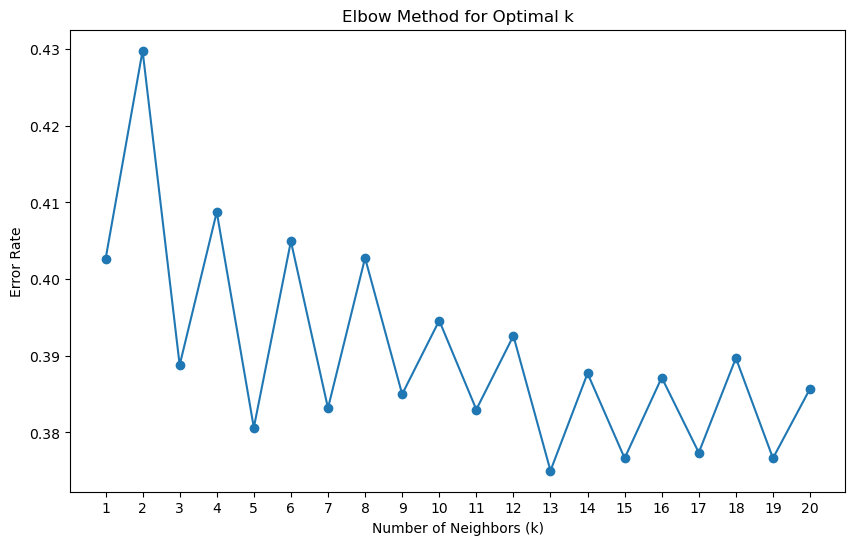

In [9]:
errors = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    error_rate = 1 - accuracy_score(Y_test, Y_pred)
    errors.append(error_rate)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), errors, marker='o')
plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal k')
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(Y_test, knn_pred)
print(f"KNN Accuracy: {knn_acc * 100:.2f}%")
print("KNN Classification Report:")
print(classification_report(Y_test, knn_pred))

KNN Accuracy: 62.50%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.84      0.69      2743
           1       0.72      0.41      0.53      2769

    accuracy                           0.62      5512
   macro avg       0.65      0.63      0.61      5512
weighted avg       0.65      0.62      0.61      5512



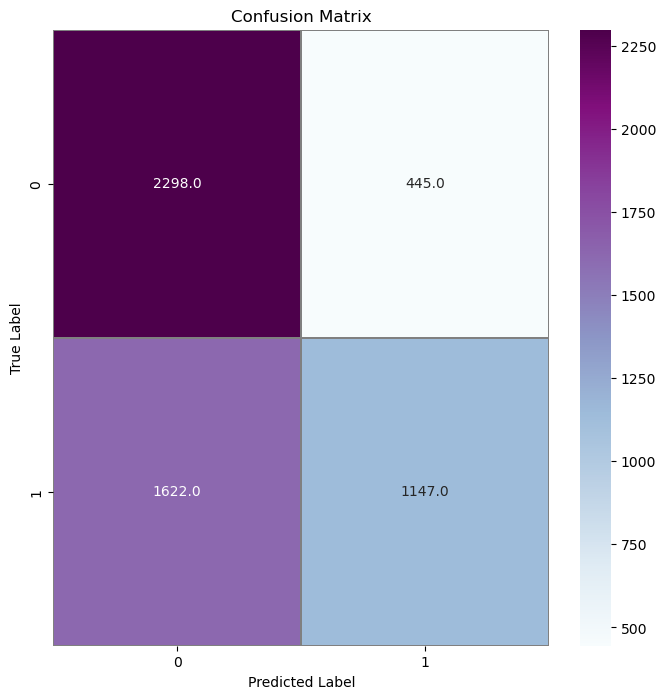

In [11]:
confusion_mtx = confusion_matrix(Y_test, knn_pred)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

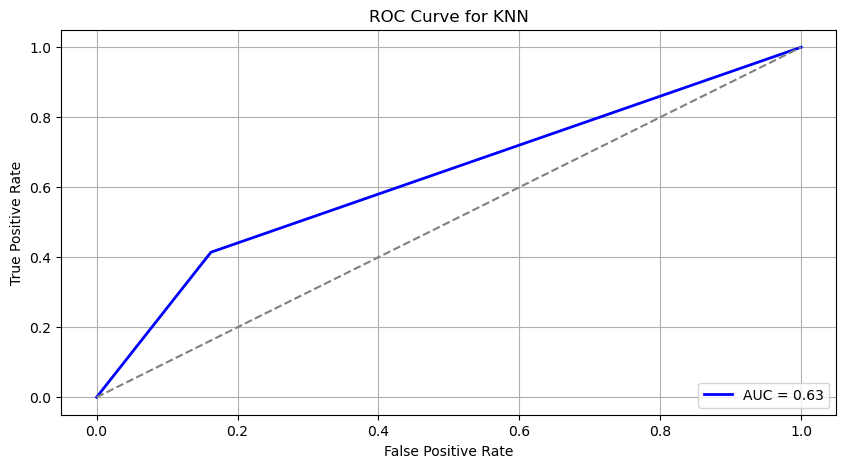

In [12]:
fpr, tpr, _ = roc_curve(Y_test, knn_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.grid()
plt.show()

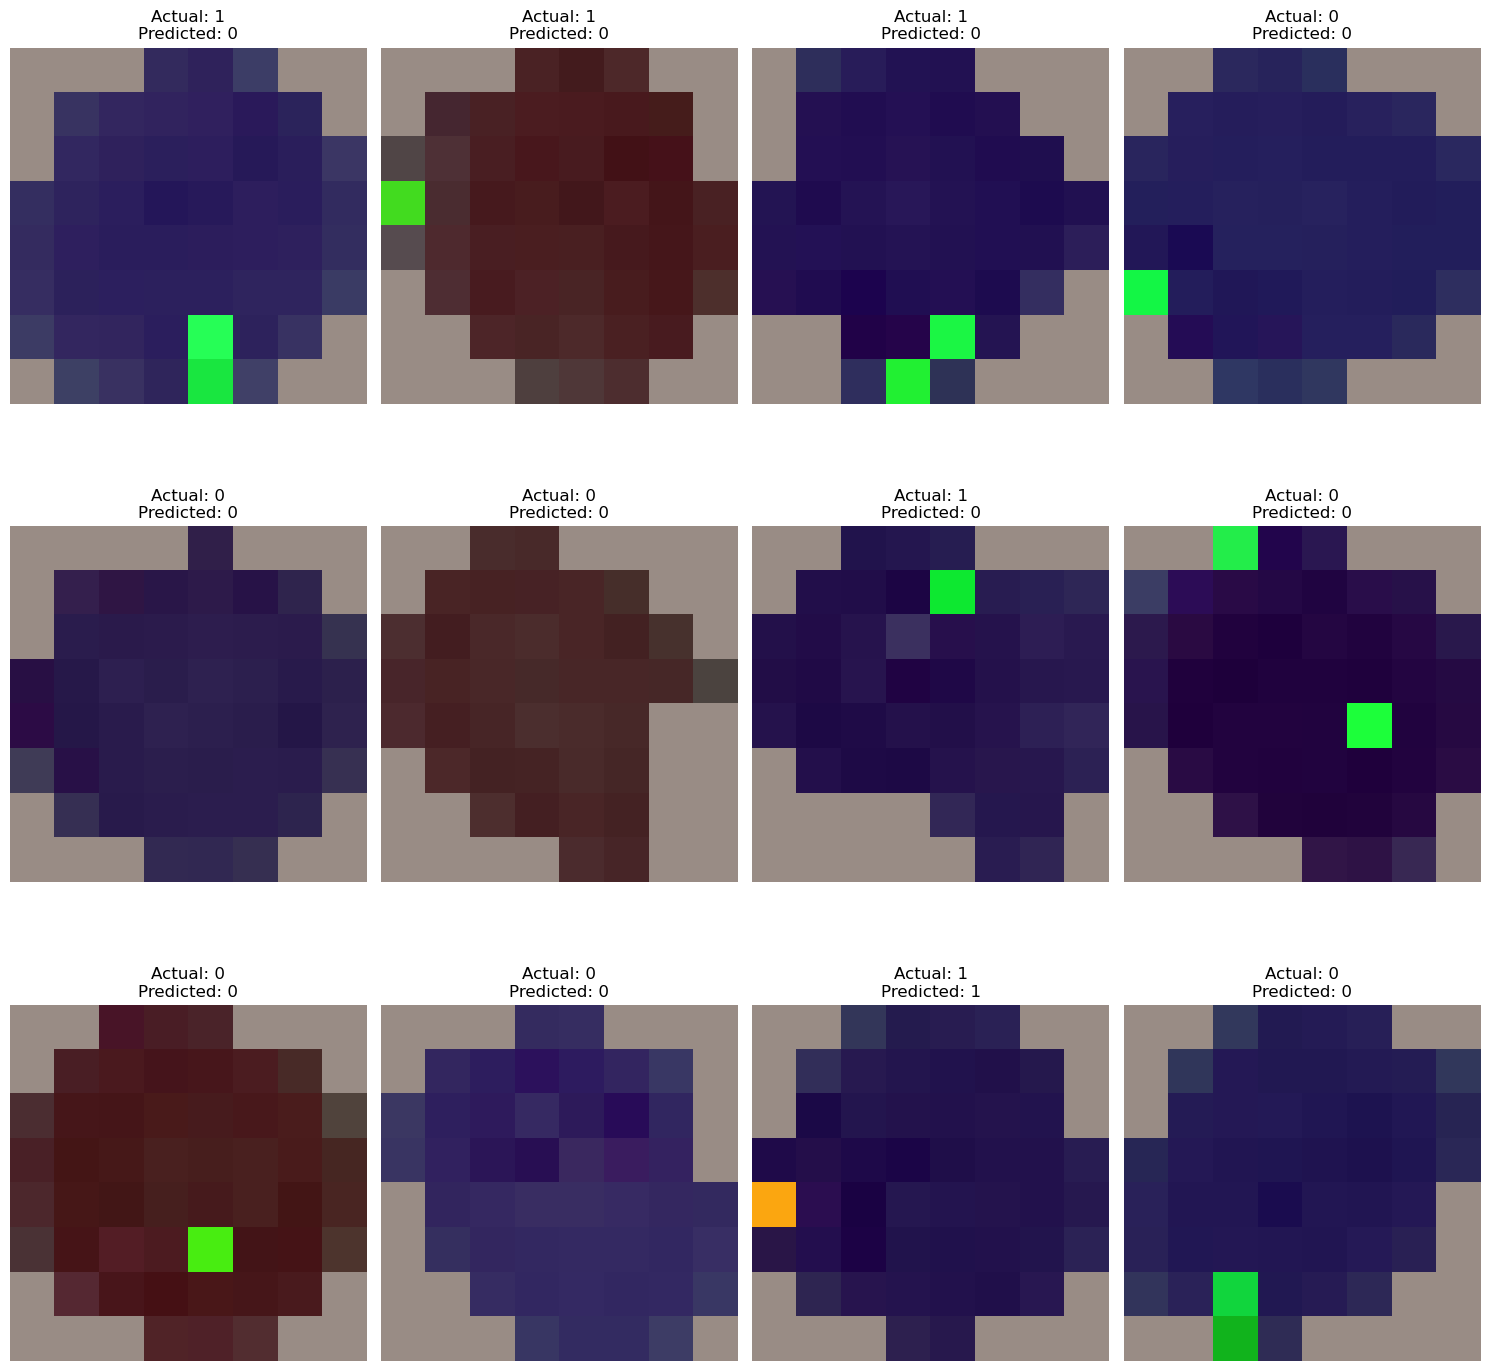

In [13]:
random_indices = np.random.choice(len(X_test), size=12, replace=False)
plt.figure(figsize=(15, 15))
for i, idx in enumerate(random_indices):
    img = X[idx].reshape(8, 8, 3)
    if img.max() <= 1.0:
        img = img * 255
    plt.subplot(3, 4, i + 1)
    plt.imshow(img.astype('uint8'))
    plt.title(f"Actual: {Y_test[idx]}\nPredicted: {knn_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Polynomial Features and Logistic Regression

In [14]:
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [15]:
logreg = LogisticRegression(max_iter=1200, C=0.5)
logreg.fit(X_train, Y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(Y_test, logreg_pred)
print(f"Logistic Regression Accuracy: {logreg_acc * 100:.2f}%")
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, logreg_pred))

Logistic Regression Accuracy: 80.95%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      2743
           1       0.84      0.77      0.80      2769

    accuracy                           0.81      5512
   macro avg       0.81      0.81      0.81      5512
weighted avg       0.81      0.81      0.81      5512



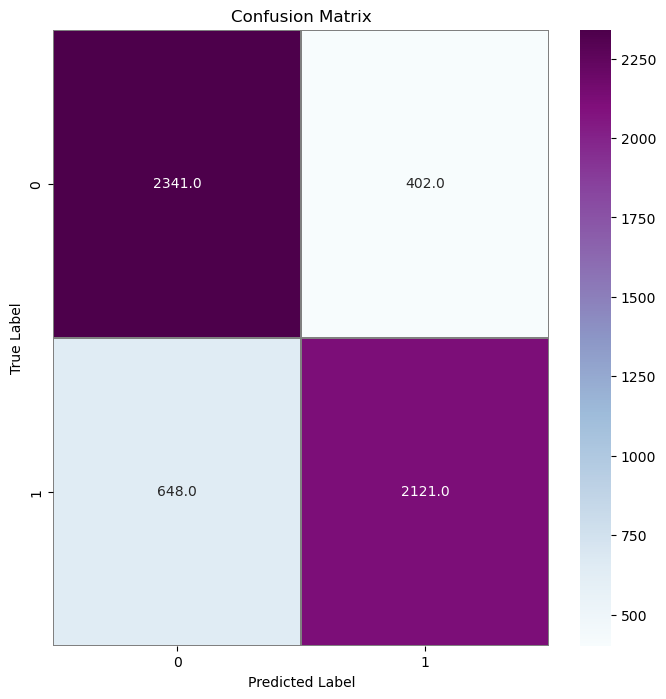

In [16]:
confusion_mtx = confusion_matrix(Y_test, logreg_pred)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

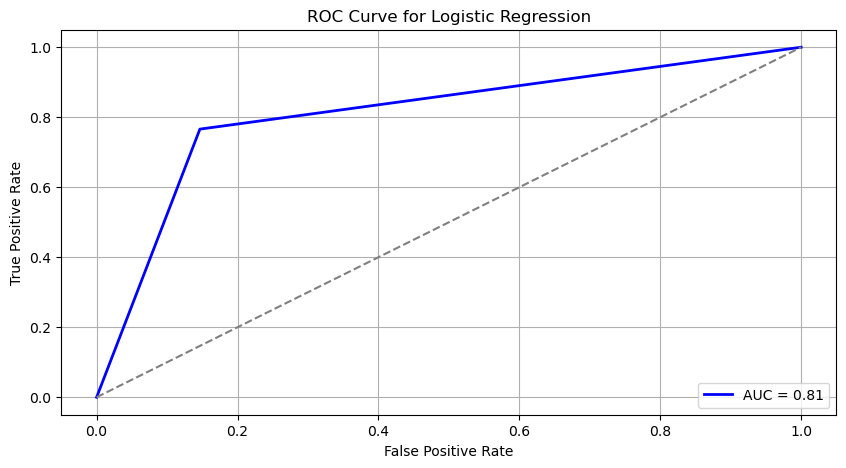

In [17]:
fpr, tpr, _ = roc_curve(Y_test, logreg_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

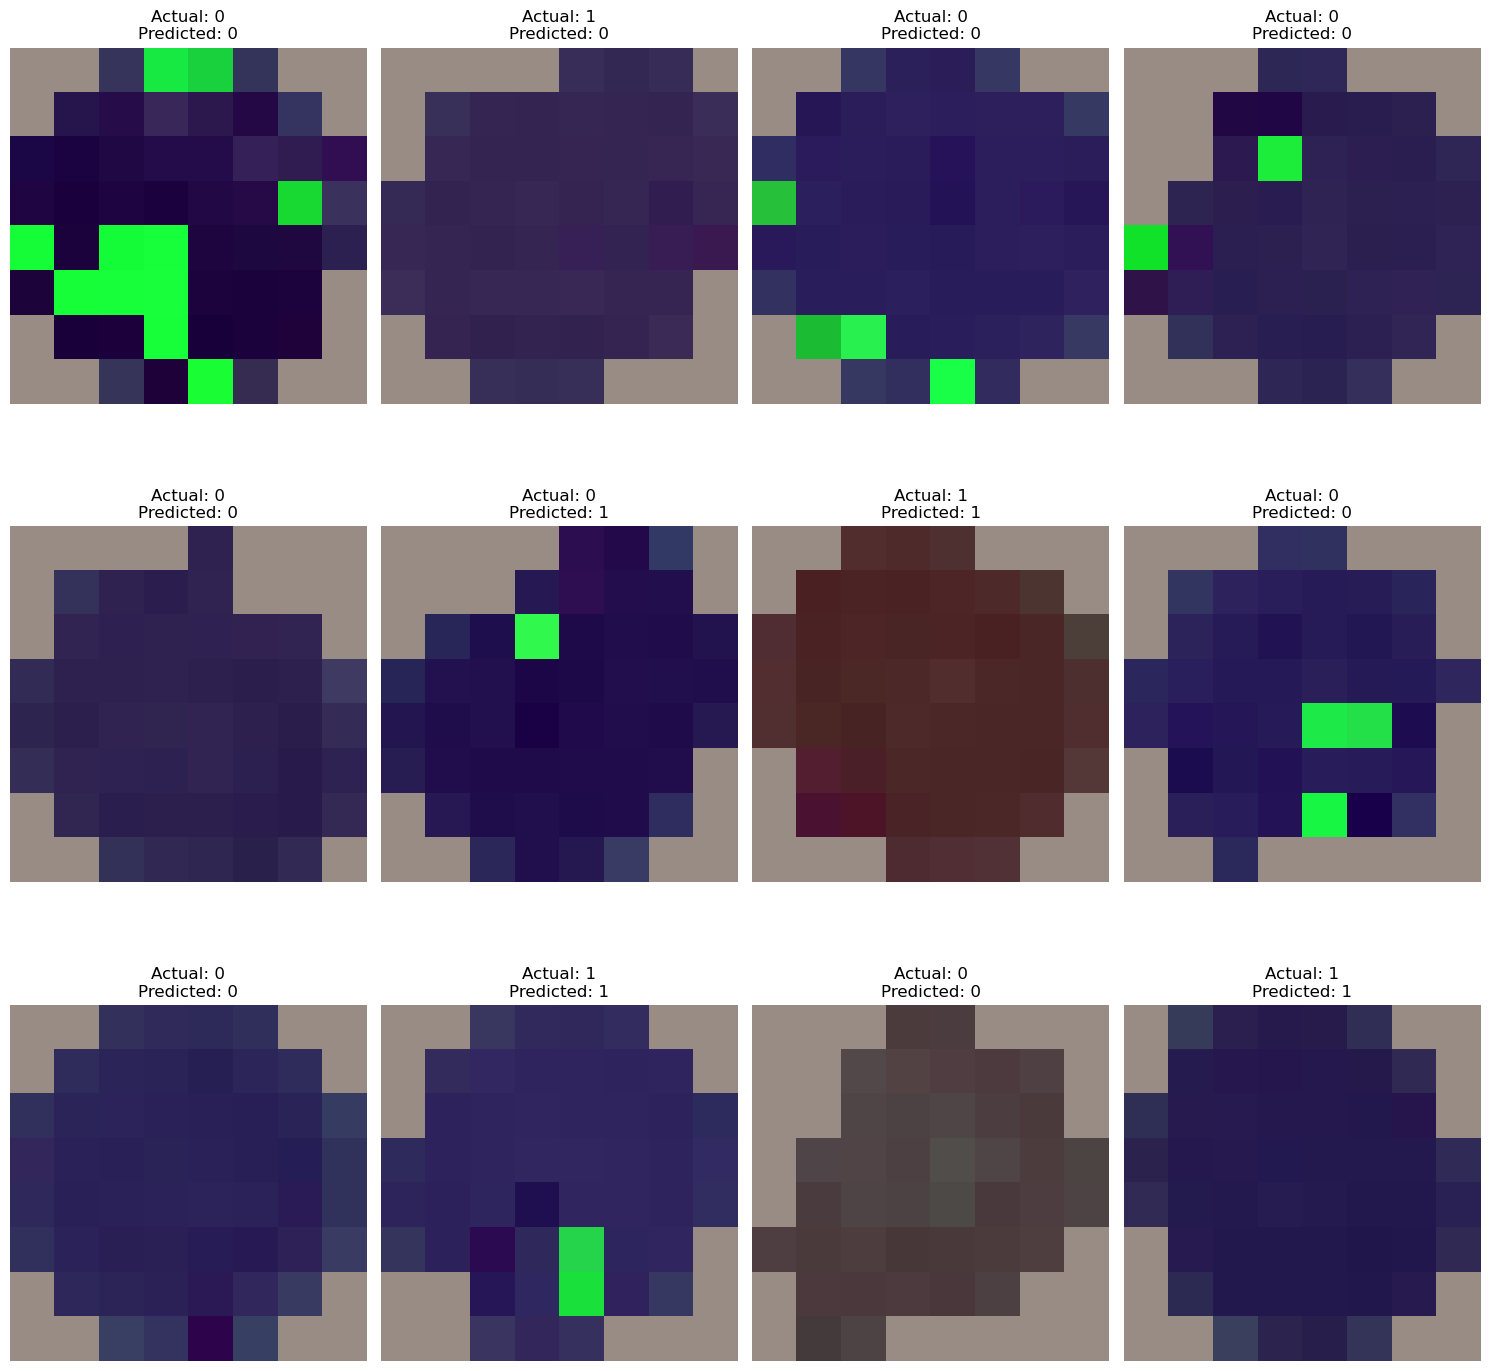

In [18]:
random_indices = np.random.choice(len(X_test), size=12, replace=False)
plt.figure(figsize=(15, 15))
for i, idx in enumerate(random_indices):
    img = X[idx].reshape(8, 8, 3)
    if img.max() <= 1.0:
        img = img * 255
    plt.subplot(3, 4, i + 1)
    plt.imshow(img.astype('uint8'))
    plt.title(f"Actual: {Y_test[idx]}\nPredicted: {logreg_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()